# Customer Churn Classification (Supervised Machine Learning Problem)

## 1. Introduction to the Business Problem

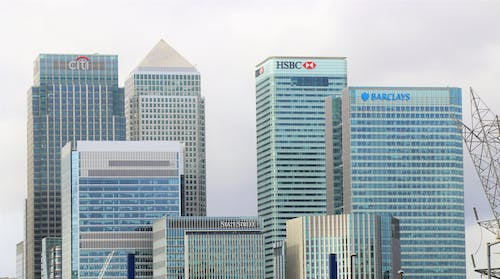

We are given the dataset about bank information of around 10000 customers and also given if they have churned or not.

Our task is to build a ML model such that we can predict if a customer is going to churn or not. We will also perform EDA on this dataset to inform the bank on what they could do to minimise the churn and build a sustainable business. We are going to implement multiple machine learning models such as Decision Tree, Random Forest, XGBoost, Logistic Regression, etc.

## 2. Dataset Description

Dataset source: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

Nr. of rows: 10,000

Nr. of explanatory features: 11

Binary target variable: **churn** (whether the customer stays with the bank or not) where 1 means the customer has left the bank, 0 means the customer has not

Explanatory Variables:

1) **customer_id** (this variable will not be used for classification) - Unique ID given to identify a particular customer.

2) **credit_score** - It is the score which determines the creditworthiness of a customer.

3) **country** - The country where customer lives.

4) **gender** - The Sex of customer.

5) **age** - The age of customer.

6) **tenure** - Number of years the customer has Bank Account in that Bank.

7) **balance** - Amount of money present in customer's bank.

8) **products_number** - Number of Products from that Bank.

9) **credit_card** - Does the customer own a credit card of that Bank.

10) **active_member** - Whether the customer is an active member of that Bank.

11) **estimated_salary** - Total Income of the Customer.

## 3. Package Imports

In [ ]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data Exploration
import missingno as msno
import plotly.express as px
# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
# Modelling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Saving the model
import pickle

In [ ]:
# Graph Styling
sns.set_palette("tab10")

## 4. Exploratory Data Analysis (EDA)

### 4.1. Data Observation

In [ ]:
file = "Bank Customer Churn Prediction.csv"
df = pd.read_csv(file)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

Checking column datatypes correctness:

In [ ]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


We have to observe this table and check if all the data actually makes sense and there are not any errors in data or typos.

Checking whether binary variables are truly binary and there are not any errors in the data or mistypings

In [ ]:
 df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

### 4.2. Removing Useless Features

The variable customer_id adds no useful information so we will remove it.

In [ ]:
df.drop(["customer_id"], axis=1, inplace=True)

### 4.3. Data Visualisation

Observing frequencies of some attribute values:

In [ ]:
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [ ]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [ ]:
df.tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [ ]:
df.products_number.value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

<Axes: xlabel='active_member', ylabel='count'>

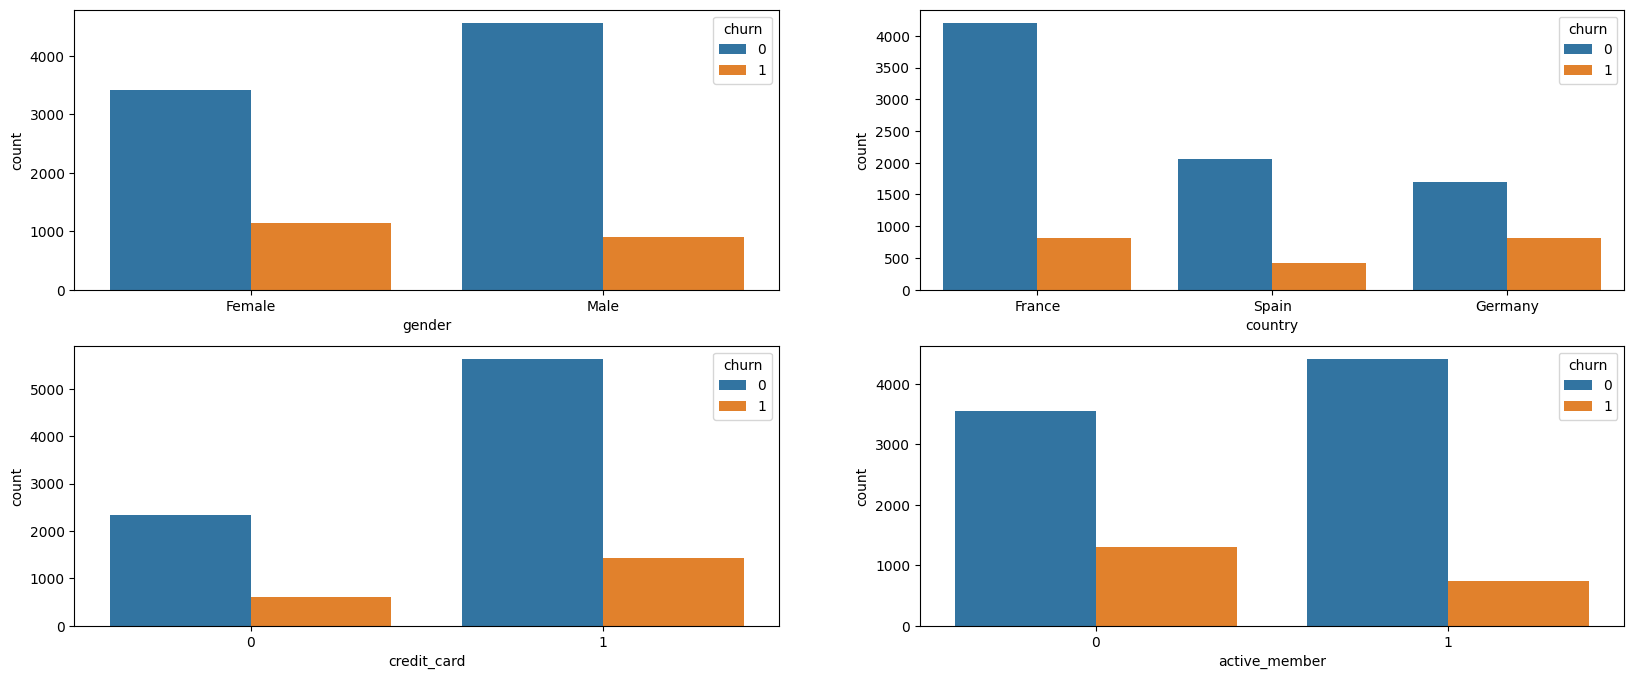

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 8))

sns.countplot(data = df, x = "gender", hue = "churn", ax = axes[0, 0])
sns.countplot(data = df, x = "country", hue = "churn", ax = axes[0, 1])
sns.countplot(data = df, x = "credit_card", hue = "churn", ax = axes[1, 0])
sns.countplot(data = df, x = "active_member", hue = "churn", ax = axes[1, 1])

In [ ]:
females = df.loc[df.gender == "Female"]["churn"]
rate_females = sum(females) / len(females)

males = df.loc[df.gender == "Male"]["churn"]
rate_males = sum(males) / len(males)

print("Percentage of females who churned: ", rate_females)
print("Percentage of males who churned: ", rate_males)

Percentage of females who churned:  0.2507153863086066
Percentage of males who churned:  0.16455928165658787


- Germany has the highest number of churners.
- Spain has relatively few churners.
- Female churners > Male churners.
- Most churners have credit cards but are not active members.

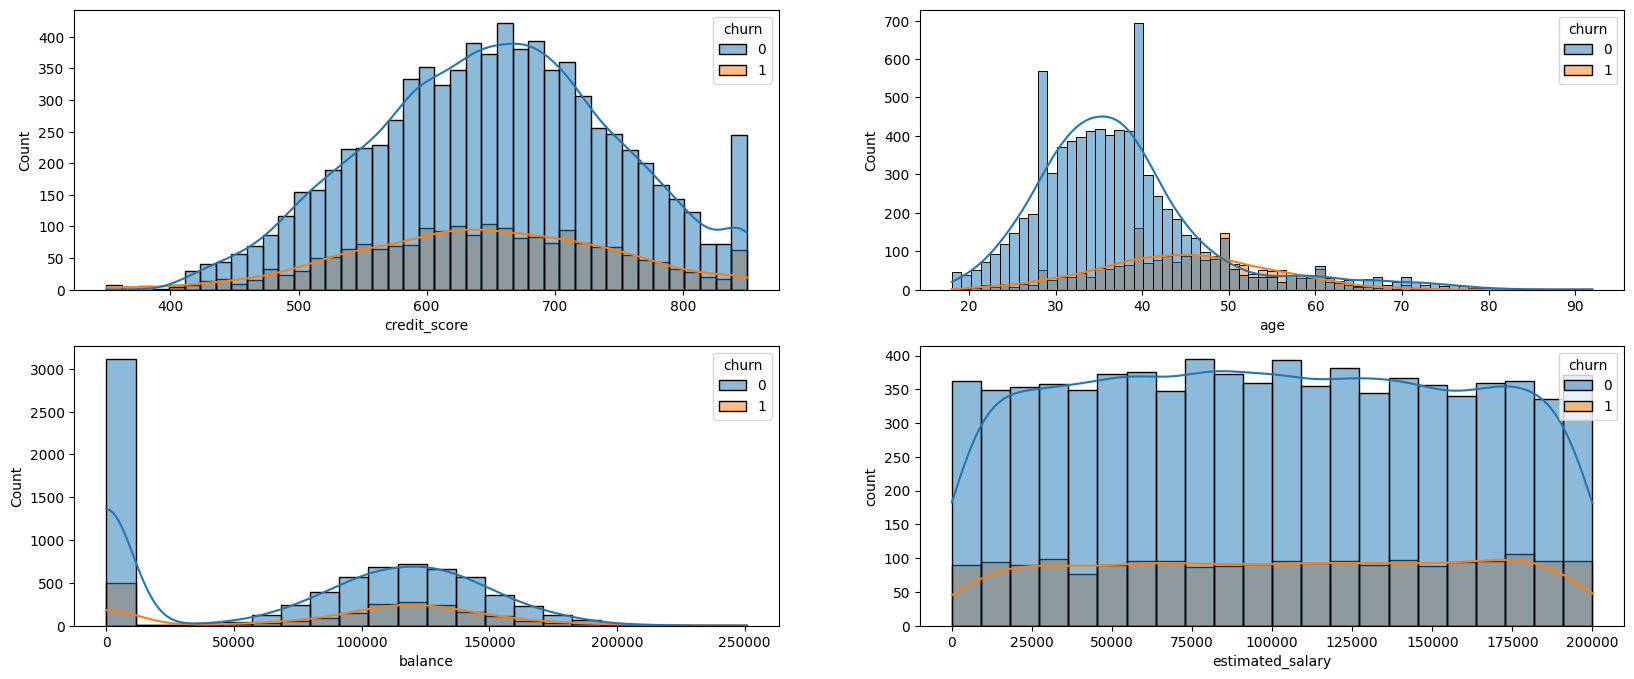

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 8))

sns.histplot(df, x = "credit_score", hue = "churn", kde = True, ax = axes[0, 0])
plt.xlabel("credit_score")
plt.ylabel("count")

sns.histplot(df, x = "age", hue = "churn", kde = True, ax = axes[0, 1])
plt.xlabel("age")
plt.ylabel("count")

sns.histplot(df, x = "balance", hue = "churn", kde = True, ax = axes[1, 0])
plt.xlabel("balance")
plt.ylabel("count")

sns.histplot(df, x = "estimated_salary", hue = "churn", kde = True, ax = axes[1, 1])
plt.xlabel("estimated_salary")
plt.ylabel("count")

plt.show()

- Almost a third of the customers (3500 out of 10000) have a zero balance in their accounts
- Most people have a credit score between 600 and 700
- Most non-churners are 30-40 years old, while most churners are 40-60 years old

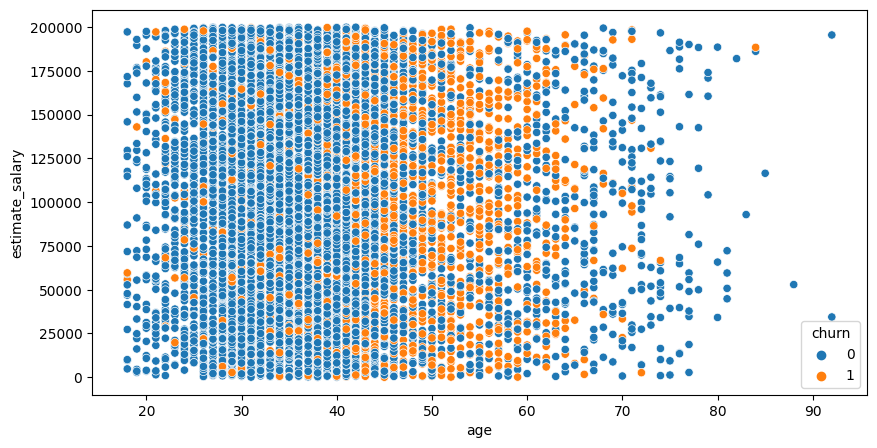

In [ ]:
plt.figure(figsize = (10, 5))

sns.scatterplot(data = df, x = "age", y = "estimated_salary", hue = "churn")
plt.xlabel("age")
plt.ylabel("estimate_salary")

plt.show()

Most of churners are indeed in the age range of about 40-65 years old.

In [ ]:
features = df.keys()
features = features.drop("churn")
df.groupby("churn")[features].mean()

<ipython-input-172-65066e49f26a>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,predicted_probability_of_churn
churn,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.124433
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.518983


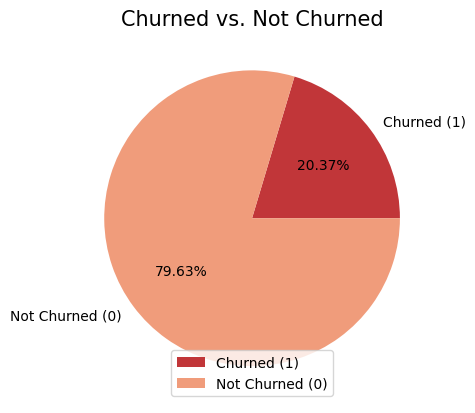

In [ ]:
sizes = [df.churn.value_counts()[1], df.churn.value_counts()[0]]
labels = ["Churned (1)", "Not Churned (0)"]

plt.pie(sizes, labels = labels, autopct = "%1.2f%%")
plt.legend(loc = "lower center")
plt.title("Churned vs. Not Churned", size = 15)
plt.show()

### 4.4. Missing Data

In [ ]:
pd.isnull(df).sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

We can see we have no missing data in the dataset.

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

### 4.5. Checking for Duplicates

In [ ]:
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    print(f'There are {duplicate_count} duplicate rows in the DataFrame.')
else:
    print('No duplicates found in the DataFrame.')

No duplicates found in the DataFrame.


In [ ]:
# Keeping the first occurrence of each duplicated row and removing the subsequent occurrences.
#df.drop_duplicates(keep='first', inplace=True)

### 4.6. Correlations

<ipython-input-12-7317c09d27e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


<Axes: >

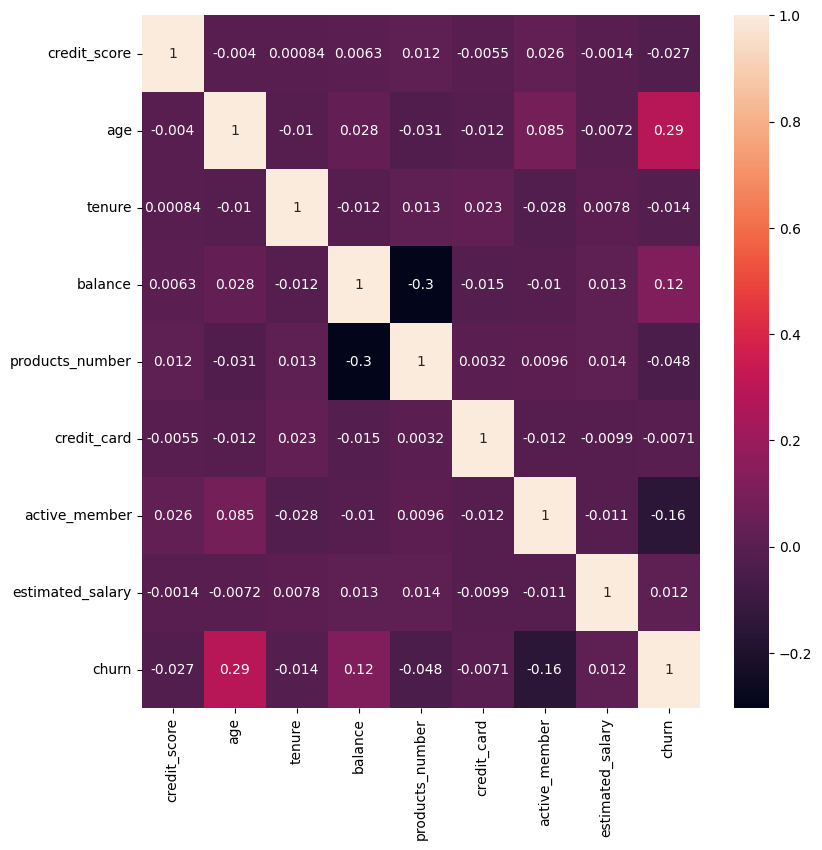

In [ ]:
plt.figure(figsize = (9, 9))
cm = df.corr()
sns.heatmap(cm, annot = True)

We will remove features which have a correlation of 0.75 or higher as these are considered highly correlated.

As we can see, none of the features in our dataset exceed this threshold so we will not remove any.

By observing the correlation matrix, we can see that age has the highest positive correlation with churn.

### 4.7. Outliers

We will be checking for outliers only in the relevant features from the dataset

<Axes: xlabel='estimated_salary'>

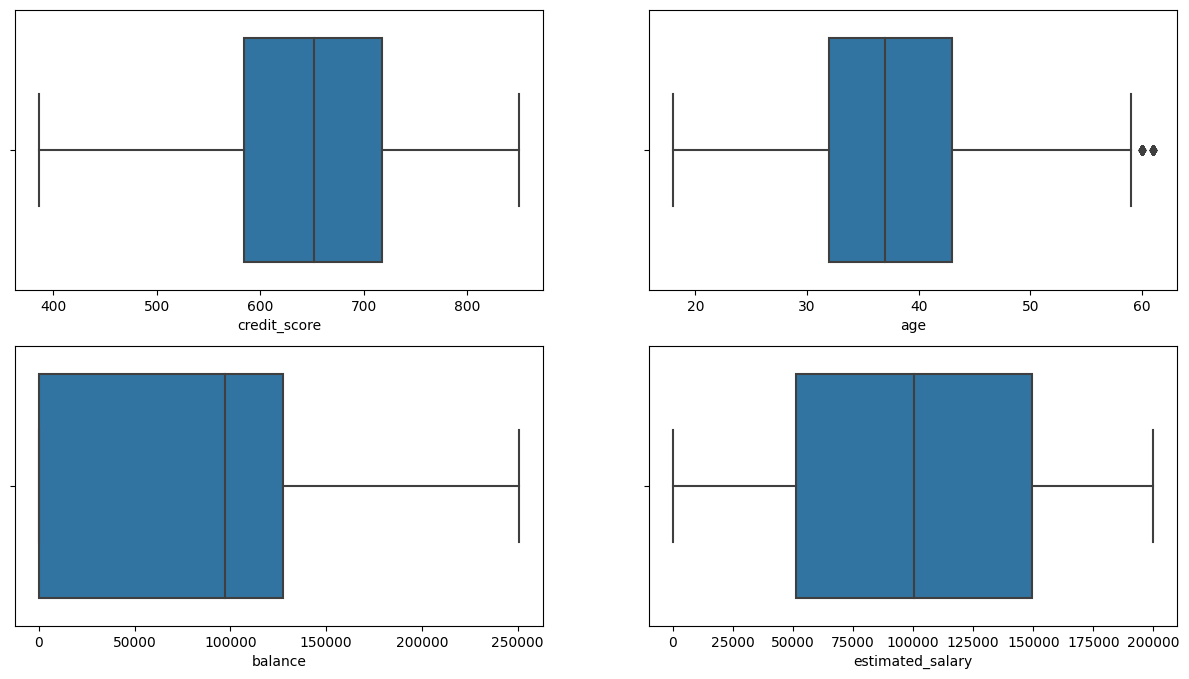

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8))

sns.boxplot(data = df, x = "credit_score", ax = axes[0, 0])
sns.boxplot(data = df, x = "age", ax = axes[0, 1])
sns.boxplot(data = df, x = "balance", ax = axes[1, 0])
sns.boxplot(data = df, x = "estimated_salary", ax = axes[1, 1])

From the boxplots, we can see that the features "credit_score" and "age" might have some outliers. We will look at these in more detail...

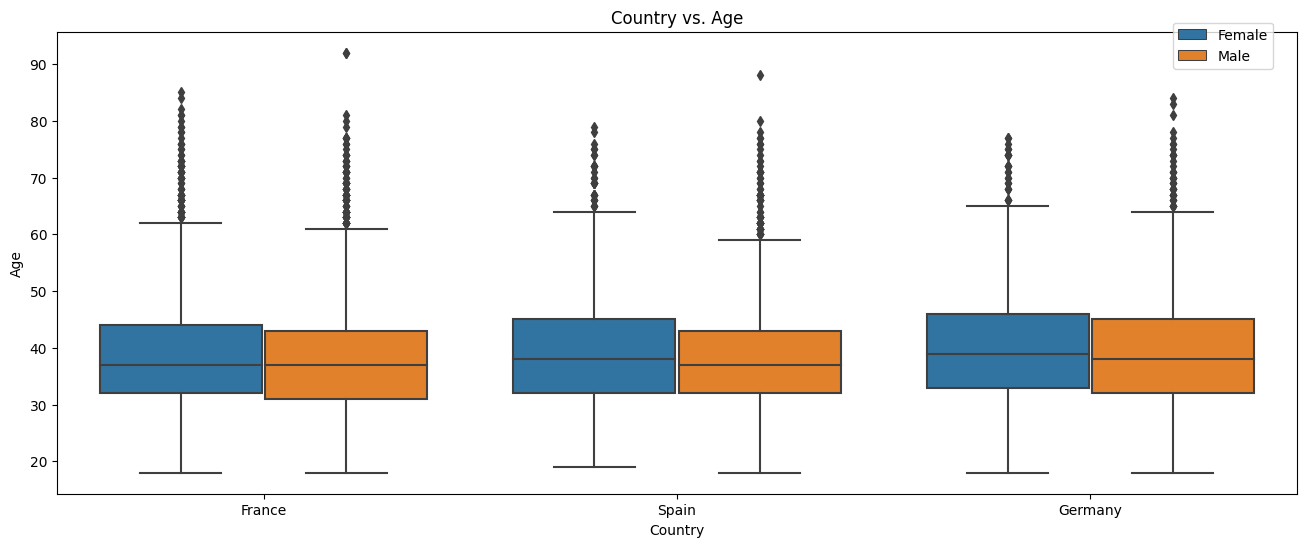

In [ ]:
plt.figure(figsize = (16,6))
sns.boxplot(x = df["country"], y = df["age"], hue = df["gender"])
plt.title("Country vs. Age")
plt.xlabel("Country")
plt.ylabel("Age")
plt.legend(loc= [0.9, 0.92])
plt.show()

It seems that the country has no impact on these age outliers.

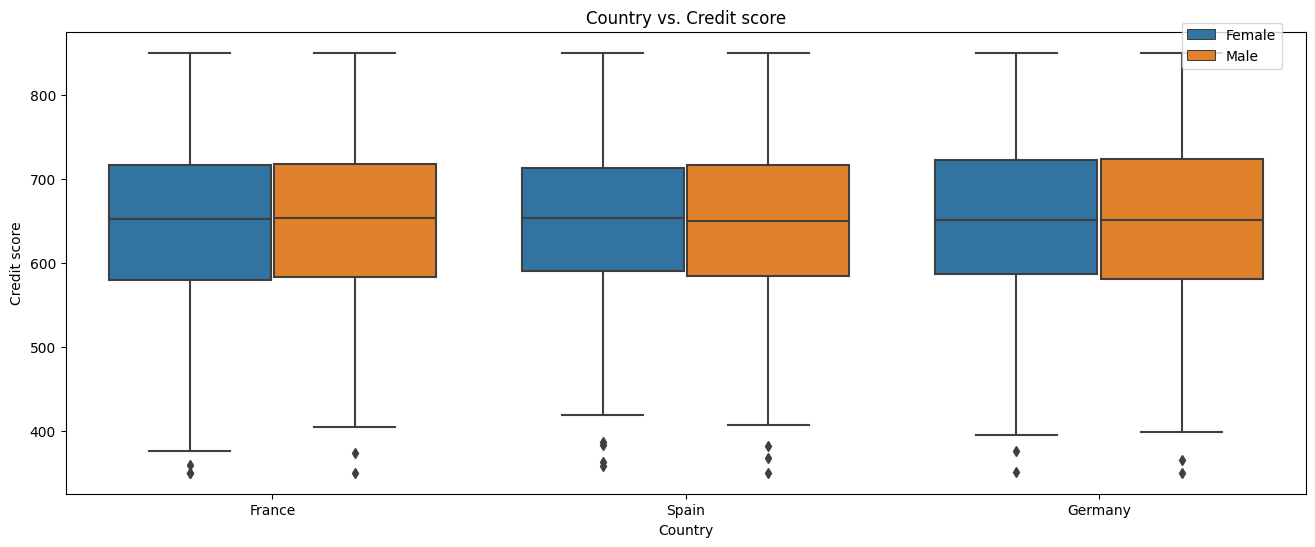

In [ ]:
plt.figure(figsize = (16,6))
sns.boxplot(x = df["country"], y = df["credit_score"], hue = df["gender"])
plt.title("Country vs. Credit score")
plt.xlabel("Country")
plt.ylabel("Credit score")
plt.legend(loc = [0.9, 0.92])
plt.show()

The same goes for the Credit score.

 We will now observe the outliers mathematically using the interquantile range...

In [ ]:
def outlier_identifier(feature):
  """This function identifies outliers of a given feature using the IQR"""
  higher_quantile = df[feature].quantile(0.75)
  lower_quantile = df[feature].quantile(0.25)
  feature_IQR = higher_quantile - lower_quantile
  upper = higher_quantile + (1.5 * feature_IQR)
  lower = lower_quantile - (1.5 * feature_IQR)
  outlier_subset_df = df[(df[feature] < lower) | (df[feature] > upper)]
  return outlier_subset_df

def remove_outliers(feature):
  """This function removes outliers of a given feature using the IQR"""
  higher_quantile = df[feature].quantile(0.75)
  lower_quantile = df[feature].quantile(0.25)
  feature_IQR = higher_quantile - lower_quantile
  upper = higher_quantile + (1.5 * feature_IQR)
  lower = lower_quantile - (1.5 * feature_IQR)
  outlier_subset_df = df[(df[feature] > lower) & (df[feature] < upper)]
  return outlier_subset_df

In [ ]:
# Observing the outliers
outliers_credit_score = outlier_identifier("credit_score")
outliers_age = outlier_identifier("age")

outliers_credit_score

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
# Removing the outliers
df = remove_outliers("credit_score")
df = remove_outliers("age")

Removing the outliers actually improved our models for this dataset.

## 5. Data Preprocessing

In [ ]:
random_seed = 42
test_dataset_size = 0.3

### 5.1. Train/Test Split (Stratified)

In [ ]:
target = "churn"
X = df.loc[:, df.columns != target] # Explanatory variables
y = df[target] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_dataset_size, stratify = y, random_state = random_seed)
len(X_train)

6701

### 5.2. Missing Data Imputation



In [ ]:
pd.isnull(df).sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

We will be using different imputation methods for categorical and for numeric features.

In [ ]:
# # List of numeric and categorical features
# categorical_features = X.select_dtypes(include = ["object"]).columns
# numeric_features = X.select_dtypes(include = ["int64", "float64"]).columns

# # Imputing missing values for categorical features
# categorical_imputer = SimpleImputer(strategy = "most_frequent")
# X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
# X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])

# # Imputing missing values for numeric features
# numeric_imputer = SimpleImputer(strategy = "mean")
# X_train[numeric_features] = numeric_imputer.fit_transform(X_train[numeric_features])
# X_test[numeric_features] = numeric_imputer.transform(X_test[numeric_features])

### 5.3. Creating New Features


We can create new features based on the existing features...

In [ ]:
def categorize_credit_score(credit_score):
    if credit_score < 400:
        return 0
    elif 400 <= credit_score < 500:
        return 1
    elif 500 <= credit_score < 600:
        return 2
    elif 600 <= credit_score < 700:
        return 3
    elif 700 <= credit_score < 800:
        return 4
    else:
        return 5

# Apply the function to create the new "credit_ordinal" feature
X_train["credit_score_ordinal"] = X_train.credit_score.apply(categorize_credit_score)
X_test["credit_score_ordinal"] = X_test.credit_score.apply(categorize_credit_score)

# Delete the original "credit_score" feature
X_train.drop(["credit_score"], axis=1, inplace=True)
X_test.drop(["credit_score"], axis=1, inplace=True)

### 5.4. Encoding Categorical Variables

In order for the models to work, all categorical variables have to be encoded first

In [ ]:
# Binary Values Encoding
le = LabelEncoder()
X_train["gender"] = le.fit_transform(X_train["gender"])
X_test["gender"] = le.transform(X_test["gender"])

# Non-Binary Values Encoding
X_train_encoded = pd.get_dummies(X_train["country"], prefix = "dummy")
X_train = pd.concat([X_train, X_train_encoded], axis = 1)
X_train.drop(["country"], axis = 1, inplace = True)

X_test_encoded = pd.get_dummies(X_test["country"], prefix = "dummy")
X_test = pd.concat([X_test, X_test_encoded], axis = 1)
X_test.drop(["country"], axis = 1, inplace = True)

In [ ]:
print(le.classes_)

['Female' 'Male']


So we know that Female is encoded as 0 and Male is encoded as 1.

### 5.5. Solving Class Imbalance


In [ ]:
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

We can see that our Target variable is slightly imbalanced in the dataset. We will try to remedy that using SMOTE.

In [ ]:
y_train.value_counts()

0    5574
1    1426
Name: churn, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy = 0.75, random_state = random_seed)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    5352
1    4014
Name: churn, dtype: int64

### 5.6. Scaling

StandardScaler is typically applied to numerical features that have a meaningful scale and are continuous in nature.

Here, suitable features to apply StandardScaler to are:
- credit_score
- balance
- estimated_salary

In [ ]:
features = ["balance", "estimated_salary"]

# Applying StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train[features])
X_test_scaled = ss.transform(X_test[features])

# Create DataFrames with just the scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = [f"{feature}_scaled" for feature in features], index = X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = [f"{feature}_scaled" for feature in features], index = X_test.index)

# Concatenate the original DataFrames with the scaled features
X_train = pd.concat([X_train, X_train_scaled_df], axis=1)
X_test = pd.concat([X_test, X_test_scaled_df], axis=1)

# Drop the original unscaled features
X_train.drop(features, axis=1, inplace=True)
X_test.drop(features, axis=1, inplace=True)

### 5.7. Principle Component Analysis (PCA)

PCA is a method to reduce dimensionality (the nr. of features) systematically

Make sure to apply StandardScaler() before doing PCA!

Firstly, we will observe how many principle components is sufficient:

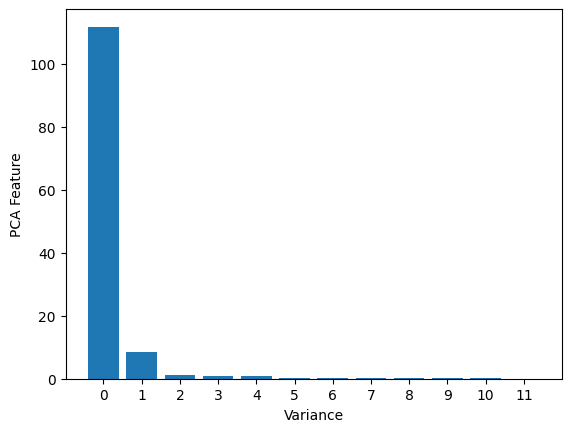

[8.95652114e-01 6.69785026e-02 8.84632959e-03 8.01619450e-03
 7.98509563e-03 2.91339611e-03 2.43379409e-03 2.05072507e-03
 1.90525519e-03 1.66489744e-03 1.55369579e-03 7.13951370e-34]
[0.89565211 0.96263062 0.97147695 0.97949314 0.98747824 0.99039163
 0.99282543 0.99487615 0.99678141 0.9984463  1.         1.        ]


In [ ]:
# Applying PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plotting the principle components
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("Variance")
plt.ylabel("PCA Feature")
plt.show()

# Printing the explained variance (cumulative sum)
print(pca.explained_variance_ratio_.cumsum())

2 principle components seems sufficient here.

In [ ]:
# # Applying PCA on our train and test sets, leaving just these 2 components
# n_components = 2
# pca_model = PCA(n_components = n_components)
# X_train = pca_model.fit_transform(X_train)
# X_test = pca_model.transform(X_test)

Here, PCA did not make the model accuracies better.

### 5.8. Observing our preprocessed data

The original preprocessed data can only be observed if we don´t apply the PCA.

In [ ]:
X_train

,gender,age,tenure,products_number,credit_card,active_member,dummy_France,dummy_Germany,dummy_Spain,credit_score_scaled,balance_scaled,estimated_salary_scaled
9136,1,20,4,1,1,0,1,0,0,-0.575582,0.312906,1.362512
6410,0,63,1,2,1,1,0,0,1,0.398182,-1.223574,1.515472
2607,1,31,1,1,1,0,1,0,0,1.693082,0.682321,0.038955
3201,1,20,6,2,1,0,1,0,0,0.740036,-1.223574,1.671444
3330,1,18,4,2,1,1,1,0,0,0.905783,-1.223574,-0.899384
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0,35,0,2,1,0,0,1,0,-0.275165,1.667285,1.116181
4644,1,74,5,2,0,0,0,0,1,0.636444,-1.223574,0.904472
8942,0,37,9,2,1,1,1,0,0,0.170280,-0.072592,-0.552359
2935,1,35,8,2,1,0,0,0,1,0.377464,0.395605,-1.344172


## 6. Modeling

### 6.1. Baseline Model (Majority Class Classifier)

As a baseline for the other models, we will create a model that always predicts the most frequent class in the training data.

In [ ]:
majority_class = y_train.value_counts().idxmax()
baseline_classifier = DummyClassifier(strategy = "constant", constant = majority_class)
baseline = baseline_classifier.fit(X_train, y_train)
predictions_baseline = baseline_classifier.predict(X_test)

### 6.2. Logistic Regression



We will be using GridSearchCV to find the best parameters for our models.

In [ ]:
# Hyperparameter Tuning
parameters_lr = {
    "penalty": ["l1", "l2", None], # Regularization penalty
    "C": [0.001, 0.01, 0.1, 1, 10], # Inverse of regularization strength
    "solver": ["saga", "liblinear"], # Algorithm to use for optimization
    "max_iter": [5000]
                }
scoring_method = "accuracy" # Also try "roc_auc", and "f1"

gridsearch_lr = GridSearchCV(LogisticRegression(random_state = random_seed), parameters_lr, cv = 5, scoring = scoring_method).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

In [ ]:
print("Best parameters for Logistic Regression: ", gridsearch_lr.best_params_)
print("Best score for Logistic Regression: ", gridsearch_lr.best_score_)

Best parameters for Logistic Regression:  {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression:  0.7922500186091612


In [ ]:
# Predictions
lr = gridsearch_lr.best_estimator_
predictions_lr = lr.predict(X_test)

Interpretation

In [ ]:
X_train.columns

Index(['gender', 'age', 'tenure', 'products_number', 'credit_card',
       'active_member', 'dummy_France', 'dummy_Germany', 'dummy_Spain',
       'credit_score_scaled', 'balance_scaled', 'estimated_salary_scaled'],
      dtype='object')

In [ ]:
np.exp(lr.coef_) # These ratios represent how a one-unit change in the feature affects the odds of the event happening.

array([[0.62232097, 1.06441764, 0.99669041, 0.93344146, 0.98310181,
        0.38084514, 0.46885166, 1.        , 0.4906449 , 0.91480177,
        1.15785884, 1.04156538]])

Being a male (Gender = 1) decreases your chance of churn by a factor of 0.62

Being an active member of the bank decreases your chance of churn by a factor of 0.38

Being from France or Spain decreases your chance of churn by a factor of 0.48 approximately

### 6.3. Decision Tree

In [ ]:
# Hyperparameter Tuning
parameters_dt = {
    "criterion": ["gini", "entropy"],          # Split criterion
    "max_depth": [None, 10, 20, 30],           # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],           # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],             # Minimum samples required to be at a leaf node
                }
scoring_method = "accuracy" # Also try "roc_auc", and "f1"

gridsearch_dt = GridSearchCV(DecisionTreeClassifier(random_state = random_seed), parameters_dt, cv = 5, scoring = scoring_method).fit(X_train, y_train)

In [ ]:
print("Best parameters for Decision Tree: ", gridsearch_dt.best_params_)
print("Best score for Decision Tree: ", gridsearch_dt.best_score_)

Best parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score for Decision Tree:  0.8375714285714286


In [ ]:
# Predictions
dt = gridsearch_dt.best_estimator_
predictions_dt = dt.predict(X_test)

### 6.4. Random Forest

In [ ]:
# Hyperparameter Tuning
parameters_rf = {
    "n_estimators": [50, 100, 200],          # Number of trees in the forest
    "max_depth": [10, 20],                   # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],         # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],           # Minimum samples required to be at a leaf node
                }
scoring_method = "accuracy" # Also try "accuracy", "roc_auc", and "f1"

gridsearch_rf = GridSearchCV(RandomForestClassifier(random_state = random_seed), parameters_rf, cv = 5, scoring = scoring_method).fit(X_train, y_train)

In [ ]:
print("Best parameters for Random Forest: ", gridsearch_rf.best_params_)
print("Best score for Random Forest: ", gridsearch_rf.best_score_)

Best parameters for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest:  0.8604285714285715


In [ ]:
rf = gridsearch_rf.best_estimator_
predictions_rf = rf.predict(X_test)

### 6.5. XGBoost Classifier

In [ ]:
# Hyperparameter Tuning
parameters_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "gamma": [0, 0.25, 1.0, 10.0],
                 }
scoring_method = "accuracy" # Also try "roc_auc", and "f1"

gridsearch_xgb = GridSearchCV(XGBClassifier(random_state = random_seed), parameters_xgb, cv = 5, scoring = scoring_method).fit(X_train, y_train)

In [ ]:
print("Best parameters for XGBoosting: ", gridsearch_xgb.best_params_)
print("Best score for XGBoosting: ", gridsearch_xgb.best_score_)

Best parameters for XGBoosting:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best score for XGBoosting:  0.8618571428571429


In [ ]:
xgb = gridsearch_xgb.best_estimator_
predictions_xgb = xgb.predict(X_test)

### 6.6. Ensemble Learning (Voting Classifier & Bagging Classifier)

Different models are trained on the same dataset and each model makes its own predictions which are then aggegated and a final prediction is outputted

In [ ]:
# Voting Classifier
classifiers = [("Random Forest", rf), ("XGBoost Classifier", xgb)]
voting = "soft" # "hard" / "soft"
vc = VotingClassifier(estimators = classifiers, voting = voting)
vc = vc.fit(X_train, y_train)
predictions_vc = vc.predict(X_test)

In [ ]:
# Bagging Classifier
n_estimators = 300
bc = BaggingClassifier(base_estimator = dt, n_estimators = n_estimators, n_jobs = -1)
bc = bc.fit(X_train, y_train)
predictions_bc = bc.predict(X_test)

## 7. Evaluation

Just some functions which will be used often:

In [ ]:
def evaluate_model(model):
  """This function takes a model as an argument and outputs evaluation metrics."""
  model_name = model.__class__.__name__

  # Predictions
  predictions = model.predict(X_test)

  # Metrics
  training_accuracy = np.round(model.score(X_train, y_train), 3)
  testing_accuracy = np.round(model.score(X_test, y_test), 3)
  F1_score = np.round(f1_score(y_test, predictions, average = "binary", labels = [0, 1]), 3) # Assuming binary classification

  # Printing
  print(f"The training accuracy of {model_name} is {training_accuracy}.")
  print(f"The testing accuracy of {model_name} is {testing_accuracy}.")
  print(f"The F1 score of {model_name} is {F1_score}.")

In [ ]:
# Evaluating the model using Stratified K-fold Crossvalidation
def evaluate_model_crossvalidated(model):
  """This function takes a model as an argument and outputs evaluation metrics using Stratified cross-validation."""

  # Cross-validation
  training_accuracies = []
  testing_accuracies = []
  f1_scores = []
  precision_scores = []
  recall_scores = []
  cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_seed)

  for train_index, test_index in cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Fit and predict
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculating Metrics
        train_accuracy = accuracy_score(y_train_fold, y_train_pred)
        test_accuracy = accuracy_score(y_test_fold, y_test_pred)
        f1 = f1_score(y_test_fold, y_test_pred, average = "binary")  # Assuming binary classification
        precision = precision_score(y_test_fold, y_test_pred)
        recall = recall_score(y_test_fold, y_test_pred)

        # Adding Metrics to the lists
        training_accuracies.append(train_accuracy)
        testing_accuracies.append(test_accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

  return [np.mean(training_accuracies), np.mean(testing_accuracies), np.mean(f1_scores), np.mean(precision_scores), np.mean(recall_scores)]

In [ ]:
def print_metrics_crossvalidated(model, train, test, f1, precision, recall):
  """This function takes a model and metrics as arguments and prints these metrics."""
  model_name = model.__class__.__name__

  # Printing
  print(f"The average training accuracy of {model_name} is {train}.")
  print(f"The average testing accuracy of {model_name} is {test}.")
  print(f"The average F1 score of {model_name} is {f1}.")
  print(f"The average Precision score of {model_name} is {precision}.")
  print(f"The average Recall score of {model_name} is {recall}.")

In [ ]:
def feature_importance(model):
    """This function takes a model as an argument and outputs a feature-importance graph."""
    features = {}
    for feature, importance in zip(X_train.columns, model.feature_importances_):
      features[feature] = importance
    importances = pd.DataFrame.from_dict(features, orient = "index").rename(columns = {0: "Gini-importance"})
    importances_sorted = importances.sort_values(by = "Gini-importance")

    plt.figure(figsize = (12, 5))
    plt.bar(importances_sorted.index, importances_sorted["Gini-importance"], color = "blue")
    plt.title("Feature Importance")
    plt.ylabel("Gini Importance")
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
def confmat(predictions):
  """This function takes model´s predictions as an argument and outputs a confusion matrix."""
  cm = confusion_matrix(y_test, predictions, labels = [0, 1])
  ConfusionMatrixDisplay(cm, display_labels = ["Not churn", "Churn"]).plot()

In [ ]:
def roc_curve_auc(model):
  """This function takes model´s predictions as an argument and outputs ROC curve as well as AUC score."""
  model_name = model.__class__.__name__
  predictions_prob = model.predict_proba(X_test.values)[:, 1] # Probabilities of the samples being a positive class
  fpr, tpr, threshold = roc_curve(y_test, predictions_prob, pos_label = model.classes_[1])
  roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = model_name)
  roc_display.plot()
  plt.title(f"Roc Curve for {model_name}")
  plt.show()

  # Area under the curve (AUC) Score
  auc_score = roc_auc_score(y_test, predictions_prob)
  print(f"The AUC score of {model_name} is {auc_score}.")

### 7.1. Baseline Model

In [ ]:
evaluate_model(baseline)

The training accuracy of DummyClassifier is 0.796.
The testing accuracy of DummyClassifier is 0.796.
The F1 score of DummyClassifier is 0.0.


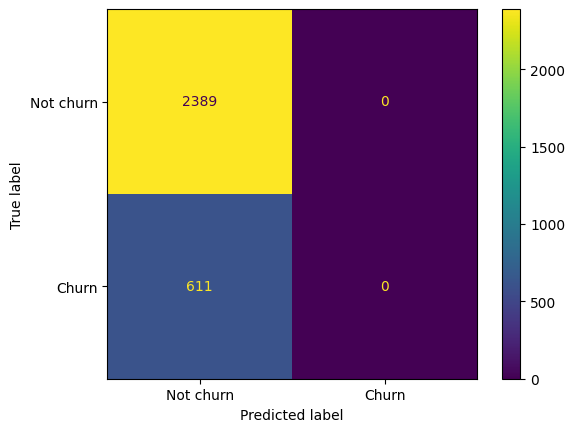

In [ ]:
confmat(predictions_baseline)

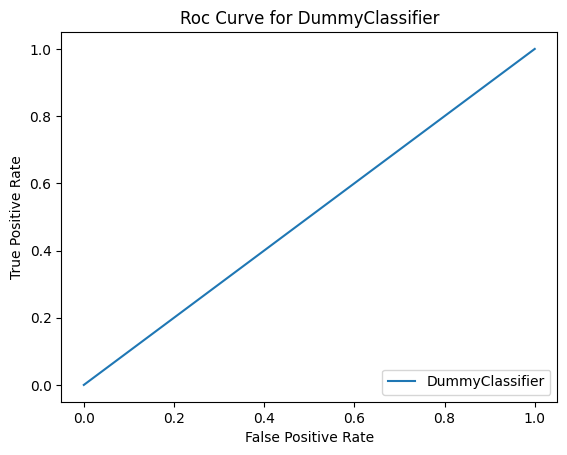

The AUC score of DummyClassifier is 0.5.


In [ ]:
roc_curve_auc(baseline)

### 7.2. Logistic Regression

In [ ]:
evaluate_model(lr)

The training accuracy of LogisticRegression is 0.811.
The testing accuracy of LogisticRegression is 0.814.
The F1 score of LogisticRegression is 0.301.


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(lr)
print_metrics_crossvalidated(lr, train, test, f1, precision, recall)

The average training accuracy of LogisticRegression is 0.8111428571428572.
The average testing accuracy of LogisticRegression is 0.8104285714285714.
The average F1 score of LogisticRegression is 0.29713056350283285.
The average Precision score of LogisticRegression is 0.6071606532267582.
The average Recall score of LogisticRegression is 0.19704028366000198.


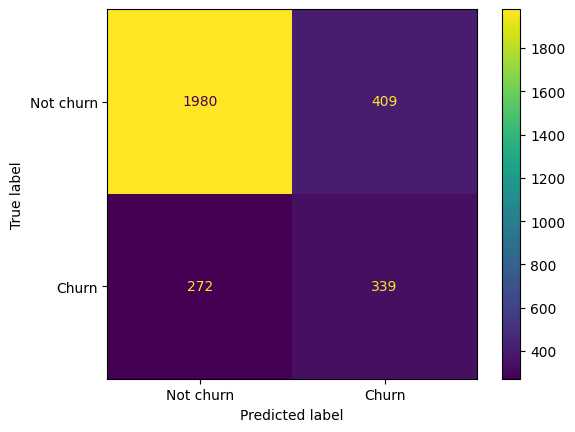

In [ ]:
confmat(predictions_lr)

We can see that the imbalanced data causes a slight problem that the model often predicts that the customer has not churned (0) when it fact he has churned (1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


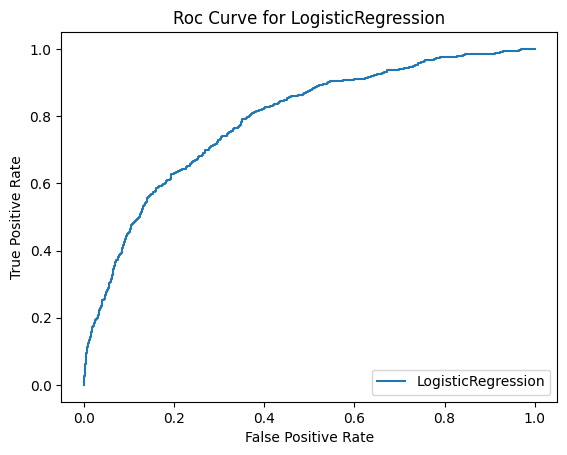

The AUC score of LogisticRegression is 0.7887720519374466.


In [ ]:
roc_curve_auc(lr)

### 7.3. Decision Tree

In [ ]:
evaluate_model(dt)

The training accuracy of DecisionTreeClassifier is 0.893.
The testing accuracy of DecisionTreeClassifier is 0.838.
The F1 score of DecisionTreeClassifier is 0.556.


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(dt)
print_metrics_crossvalidated(dt, train, test, f1, precision, recall)

The average training accuracy of DecisionTreeClassifier is 0.8917777777777778.
The average testing accuracy of DecisionTreeClassifier is 0.8364285714285714.
The average F1 score of DecisionTreeClassifier is 0.5410784465529159.
The average Precision score of DecisionTreeClassifier is 0.6329214493045773.
The average Recall score of DecisionTreeClassifier is 0.4761548310844086.


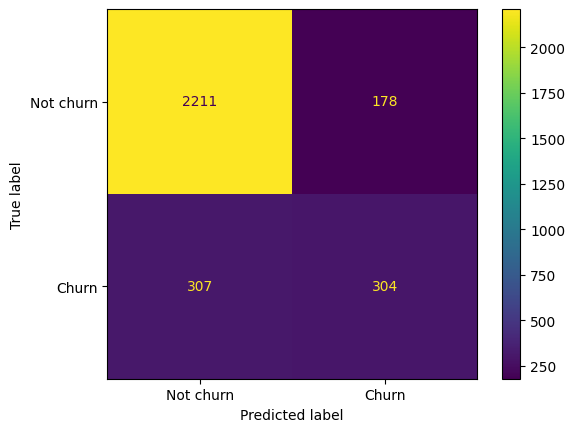

In [ ]:
confmat(predictions_dt)

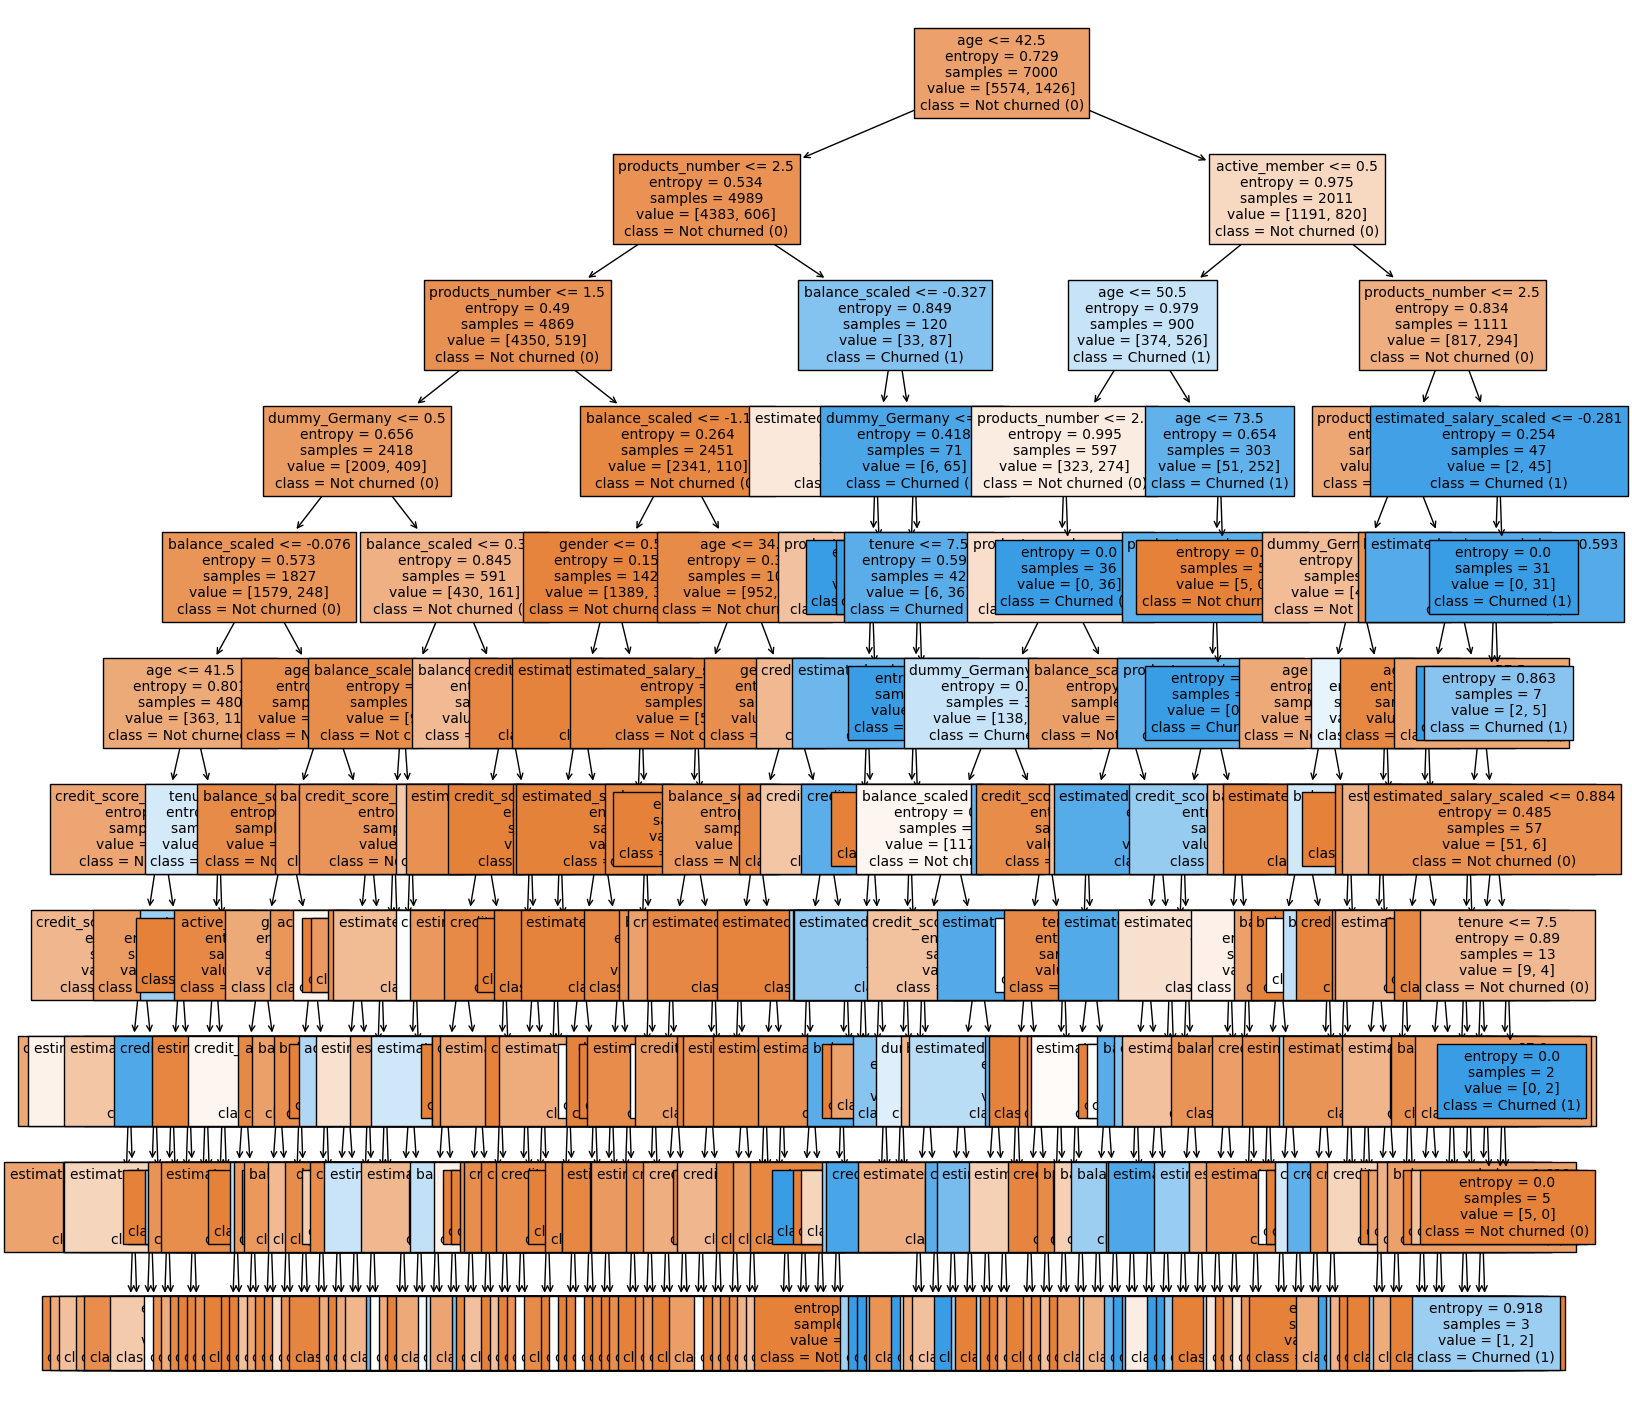

In [ ]:
plt.figure(figsize = (18, 18))
plot_tree(dt, feature_names = list(dt.feature_names_in_), class_names = ["Not churned (0)", "Churned (1)"], filled = True, fontsize = 10)
plt.show()

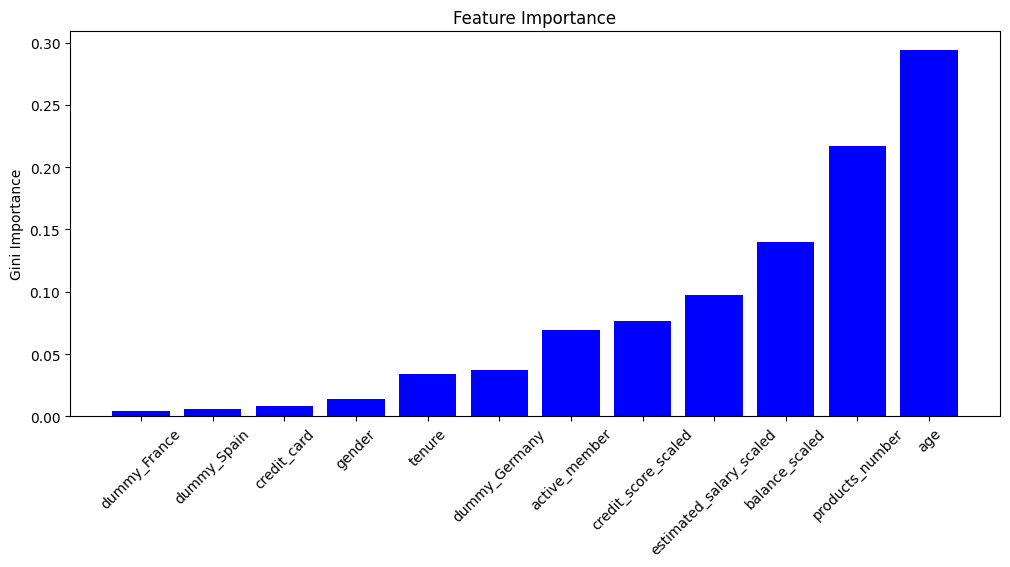

In [ ]:
feature_importance(dt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


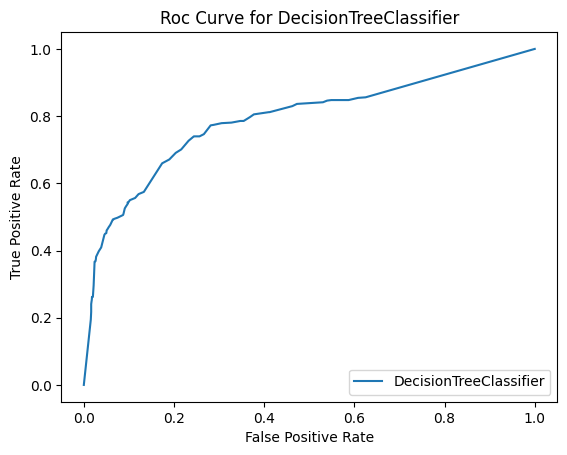

The AUC score of DecisionTreeClassifier is 0.7899921832128844.


In [ ]:
roc_curve_auc(dt)

### 7.4. Random Forest

In [ ]:
evaluate_model(rf)

The training accuracy of RandomForestClassifier is 0.948.
The testing accuracy of RandomForestClassifier is 0.866.
The F1 score of RandomForestClassifier is 0.583.


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(rf)
print_metrics_crossvalidated(rf, train, test, f1, precision, recall)

The average training accuracy of RandomForestClassifier is 0.949031746031746.
The average testing accuracy of RandomForestClassifier is 0.8608571428571429.
The average F1 score of RandomForestClassifier is 0.5625117030665566.


The Random Forest is slightly overfitted on the training set.

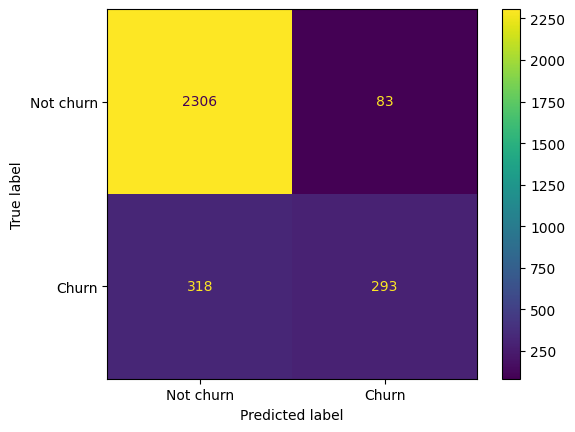

In [ ]:
confmat(predictions_rf)

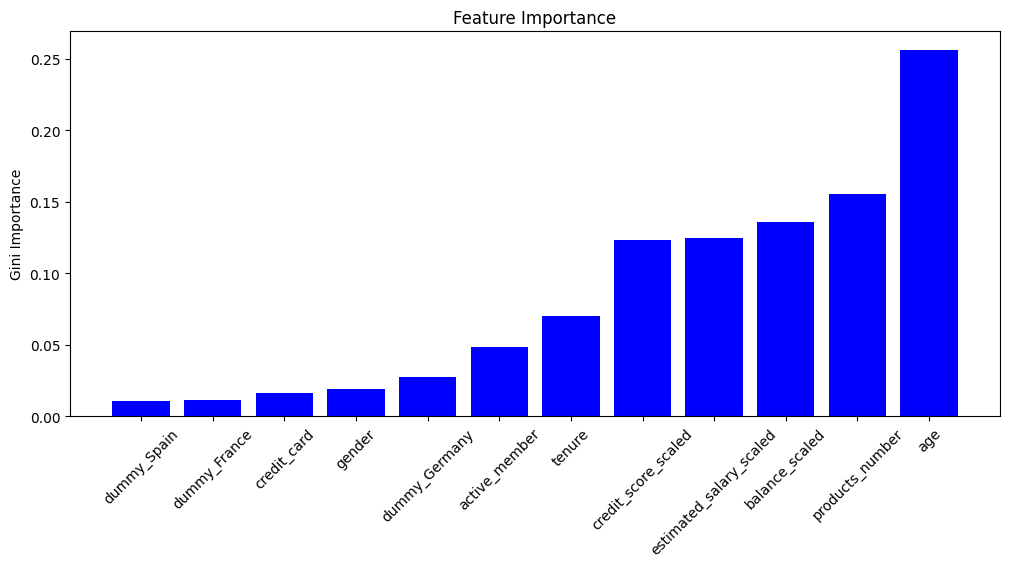

In [ ]:
feature_importance(rf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


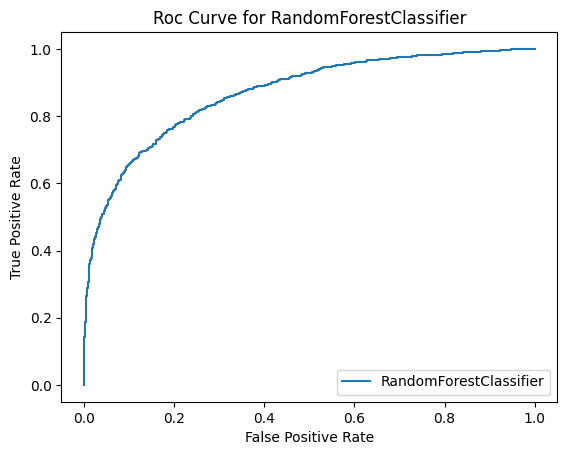

The AUC score of RandomForestClassifier is 0.8687615564791986.


In [ ]:
roc_curve_auc(rf)

### 7.5. XGBoosting Classifier

In [ ]:
evaluate_model(xgb)

The training accuracy of XGBClassifier is 0.878.
The testing accuracy of XGBClassifier is 0.867.
The F1 score of XGBClassifier is [0.921 0.599].


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(xgb)
print_metrics_crossvalidated(xgb, train, test, f1, precision, recall)

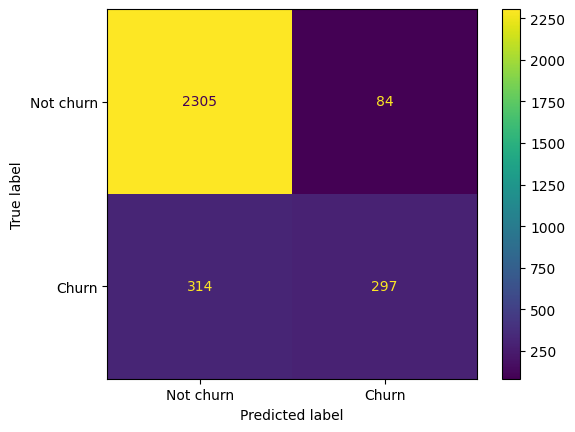

In [ ]:
confmat(predictions_xgb)

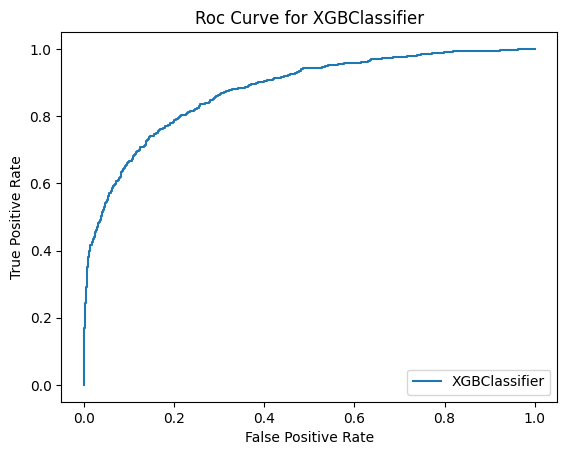

The AUC score of XGBClassifier is 0.8774792265970807.


In [ ]:
roc_curve_auc(xgb)

### 7.6. Ensemble Learning (Voting Classifier)

In [ ]:
evaluate_model(vc)

The training accuracy of VotingClassifier is 0.904.
The testing accuracy of VotingClassifier is 0.86.
The F1 score of VotingClassifier is [0.917 0.559].


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(vc)
print_metrics_crossvalidated(vc, train, test, f1, precision, recall)

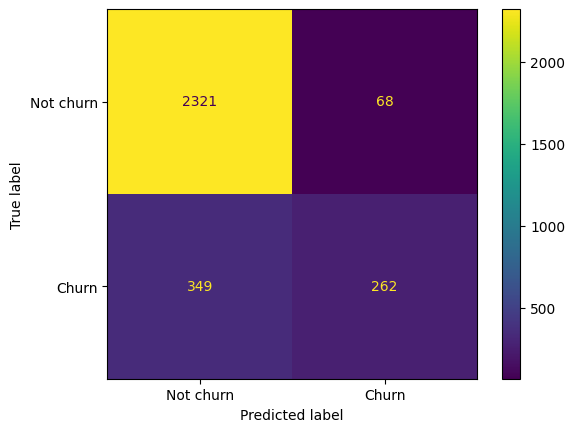

In [ ]:
confmat(predictions_vc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


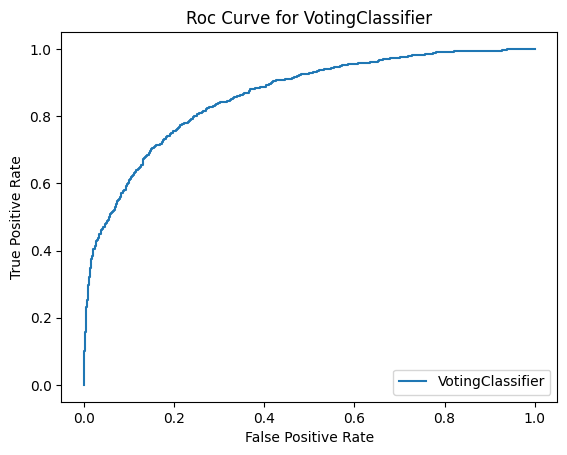

The AUC score of VotingClassifier is 0.8602548916576863.


In [ ]:
roc_curve_auc(vc)

### 7.7. Ensemble Learning (Bagging Classifier)

In [ ]:
evaluate_model(bc)

The training accuracy of BaggingClassifier is 0.9.
The testing accuracy of BaggingClassifier is 0.868.
The F1 score of BaggingClassifier is [0.921 0.599].


In [ ]:
train, test, f1, precision, recall = evaluate_model_crossvalidated(bc)
print_metrics_crossvalidated(bc, train, test, f1, precision, recall)

## 8. Model Comparison and Interpretation

### 8.1. Model Comparison

In [ ]:
models = [rf, xgb, vc] # [baseline, lr, dt, rf, vc, bc, xgb] for all models
labels = ["Random Forest", "XGBoost", "Voting Classifier"] # ["Baseline Model", "Logistic Regression", "Decision Tree", "Random Forest", "Voting Classifier", "Bagging Classifier", "XGBoost"] for all models
metrics_summary = pd.DataFrame()
metrics_summary.index = ["Training score", "Testing score", "F1 score", "Precision score", "Recall score"]

def compare_models(models, labels):
  for i, model in enumerate(models):
    metrics_summary[labels[i]] = evaluate_model_crossvalidated(model)
  return metrics_summary

In [ ]:
compare_models(models, labels)

,Random Forest,XGBoost,Voting Classifier
Training score,1.000000,0.956580,0.985598
Testing score,0.874334,0.877431,0.882128
F1 score,0.849744,0.854427,0.859457
Precision score,0.871482,0.870453,0.879048
Recall score,0.829101,0.839062,0.840804


XGBoost seems to be the best model here with about 87% accuracy.

In [ ]:
print("Best parameters for XGBoosting: ", gridsearch_xgb.best_params_)

Best parameters for XGBoosting:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


These are the optimal hyperparameters for xgb

### 8.2. XGBoost Interpretation

Subsetting customers who are most likely to churn:

In [ ]:
# Concatenate X_train and X_test to get predictions for the entire dataset
X_full = pd.concat([X_train, X_test])

# Get predicted probabilities for label 1 and add them to DataFrame
predicted_probabilities = xgb.predict_proba(X_full)[:, 1]
X_full["predicted_probability_of_churn"] = predicted_probabilities

# Inserting the predicted probabilities to the original dataframe so that it matches with the row IDs correctly
df["predicted_probability_of_churn"] = X_full["predicted_probability_of_churn"].reindex(df.index)
df_sorted = df.sort_values(by = "predicted_probability_of_churn", ascending = False)

# Printing all customers which have a probability of 90 % or higher of churning
top_rows = df_sorted[df_sorted["predicted_probability_of_churn"] >= 0.9]
print(top_rows)

      credit_score  country  gender  age  tenure    balance  products_number  \
8923           625  Germany  Female   55       8  118772.71                4   
70             738  Germany    Male   58       2  133745.44                4   
1962           358    Spain  Female   52       8  143542.36                3   
8683           697   France  Female   49       7  195238.29                4   
4013           720  Germany  Female   57       1  162082.31                4   
...            ...      ...     ...  ...     ...        ...              ...   
3940           716  Germany    Male   66       5  121411.90                1   
8348           642  Germany  Female   36       2  124495.98                3   
2900           626    Spain  Female   26       8  148610.41                3   
5683           615   France  Female   61       1  104267.70                1   
2916           651   France    Male   56       2       0.00                1   

      credit_card  active_member  estim

Observing the ages:

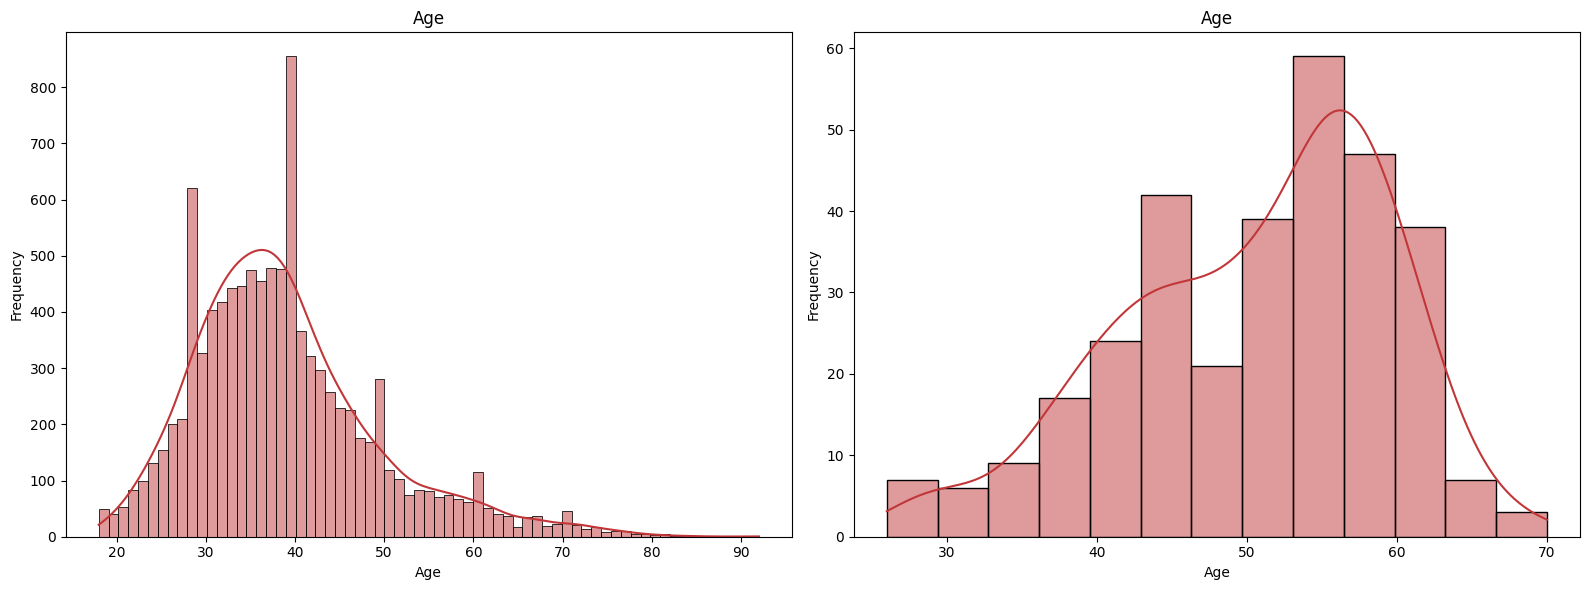

In [ ]:
plt.figure(figsize = (16, 6))

# Plot 1 - Original df
plt.subplot(1, 2, 1)
sns.histplot(x = df["age"], kde = True)
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Plot 2 - the subsetted df
plt.subplot(1, 2, 2)
sns.histplot(x = top_rows["age"], kde = True)
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
avg_age = np.round(df["age"].mean(), 1)
avg_age_subset = np.round(top_rows["age"].mean(), 1)
print(f"The average age of a general customer is: {avg_age} years")
print(f"The average age of customers with a churn probability of 90 % or higher is: {avg_age_subset} years")

The average age of a general customer is: 38.9 years
The average age of customers with a churn probability of 90% or higher is: 50.6 years


<Axes: xlabel='country', ylabel='count'>

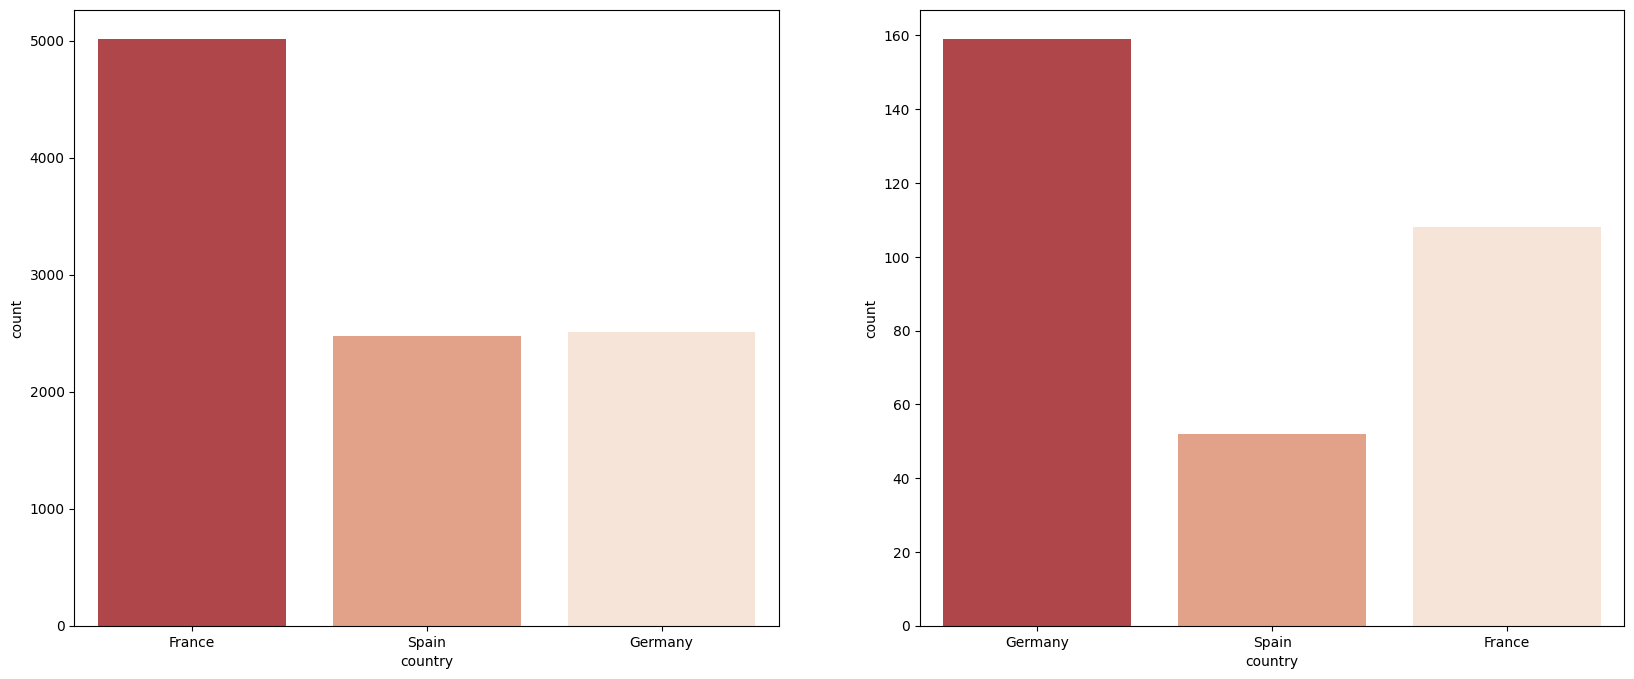

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

sns.countplot(data = df, x = "country", ax = axes[0])
sns.countplot(data = top_rows, x = "country", ax = axes[1])

Customers from Germany are the most likely to churn out of all 3 countries.

### 8.3. Prediction for a single new input

In [ ]:
new_input = [[400, 1, 0, 50, 3, 500.00, 1, 1, 0, 200000.00]]
# Tyto column labels mam asi nejspise spatne urcite...
columns = ["credit_score", "country", "gender", "age", "tenure", "balance", "products_number", "credit_card",	"active_member"	,"estimated_salary"]
sample_df = pd.DataFrame(new_input, columns = columns)

print("Sample input: \n")
display(sample_df.style.set_properties(**{"border" : "1px solid"}))
print("\nPredicted value: \n")
prediction = xgb.predict(sample_df)

if prediction[0] == 1:
  print("Customer is likely to leave.")
else:
  print("Customer is likely to stay.")

## 9. Conclusion

The most important features are:
- Age
- Nr. of Products
- Balance
- Estimated Salary


These customers are most likely to churn and, therefore, should be targetted:
- Consumers in their 50s
- Consumers from Germany



## Saving the best model

In [ ]:
with open("./dadad/xgboost.pkl", "wb") as file:
  pickle.dump(xgb, file)

## How to load the model

In [ ]:
# with open("./dadad/xgboost.pkl", "rb") as file:
#   loaded_xgb_model = pickle.load(file)